In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carga de datos

In [165]:
data=pd.read_csv("../data/ms_authors.csv",dtype={"age":int,"time":int})
data["citations/products"]=data["citations"]/data["products"]
data

,products,citations,press,age,sex,time,level,category,citations/products
0,101,94,8,59,M,31,DOCTORADO,TITULAR,0.930693
1,23,6,2,74,M,49,DOCTORADO,TITULAR,0.260870
2,35,32,2,49,M,12,DOCTORADO,ASOCIADO,0.914286
3,5,1,9,55,F,26,DOCTORADO,ASOCIADO,0.200000
4,120,149,2,68,M,26,DOCTORADO,TITULAR,1.241667
...,...,...,...,...,...,...,...,...,...
280,10,4,5,55,M,17,MAESTRIA,ASISTENTE,0.400000
281,49,34,4,62,F,34,MAESTRIA,TITULAR,0.693878
282,3,0,1,46,M,19,DOCTORADO,ASOCIADO,0.000000
283,17,9,1,52,F,13,DOCTORADO,ASOCIADO,0.529412


### Descripción de los datos
Los datos provienen de las dependencias puntaje y recurso humano de la universidad de antioquia. Con ellos realizamos un proceso de búsqueda de la aparición del investigador en medios de comunicación (prensa).
Ignoramos los docentes que no tienen producción científica.

Las variables se describen a continuación:
* products (int): Cantidad de publicaciones
* citations (int): Cantidad de veces que han sido citados todos los productos
* citations/products (float): Cantidad de citas dividido la cantidad de productos
* press (int): cantidad de artículos de prensa en los que ha aparecido el investigador
* age (int): Edad del investigador
* time (int): Años que el investigador ha estado en la universidad
* sex (str): Sexo del investigador
* level (str): Nivel académico
* category (str): Categoría

# Análisis exploratorio univariado

In [166]:
data.describe()

,products,citations,press,age,time,citations/products
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,39.178947,38.298246,5.849123,51.761404,16.410526,0.756697
std,60.027689,74.002799,16.079962,9.083295,9.243378,0.876958
min,1.000000,0.000000,1.000000,32.000000,2.000000,0.000000
25%,7.000000,2.000000,1.000000,45.000000,10.000000,0.187500
50%,20.000000,9.000000,2.000000,51.000000,16.000000,0.500000
75%,49.000000,45.000000,4.000000,59.000000,21.000000,1.000000
max,481.000000,675.000000,199.000000,79.000000,50.000000,5.843750


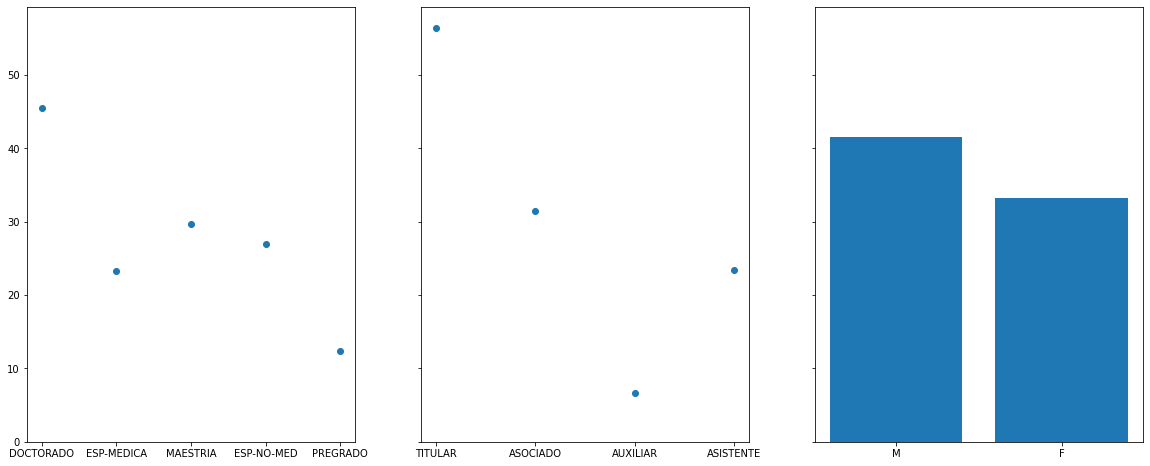

In [167]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["products"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["products"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["products"])
plt.show()

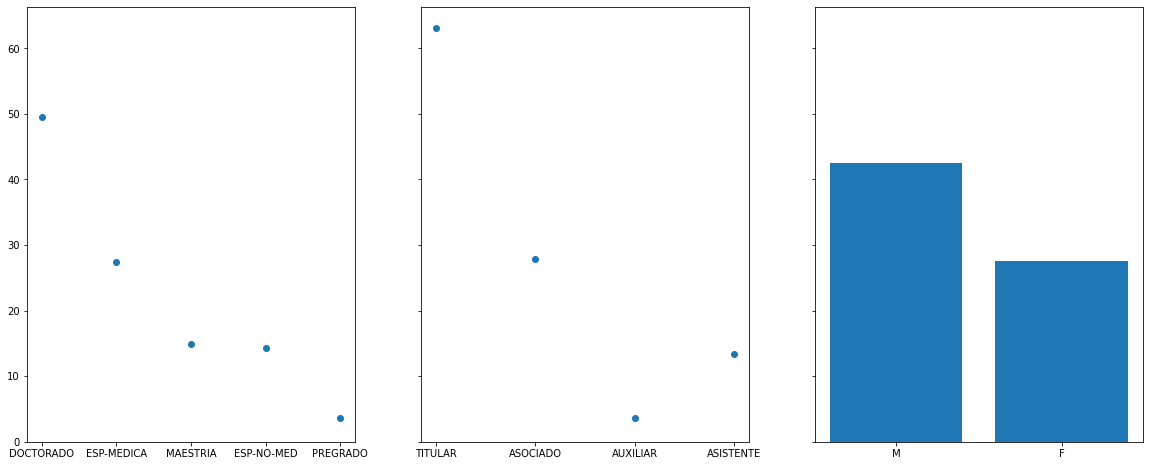

In [168]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["citations"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["citations"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["citations"])
plt.show()

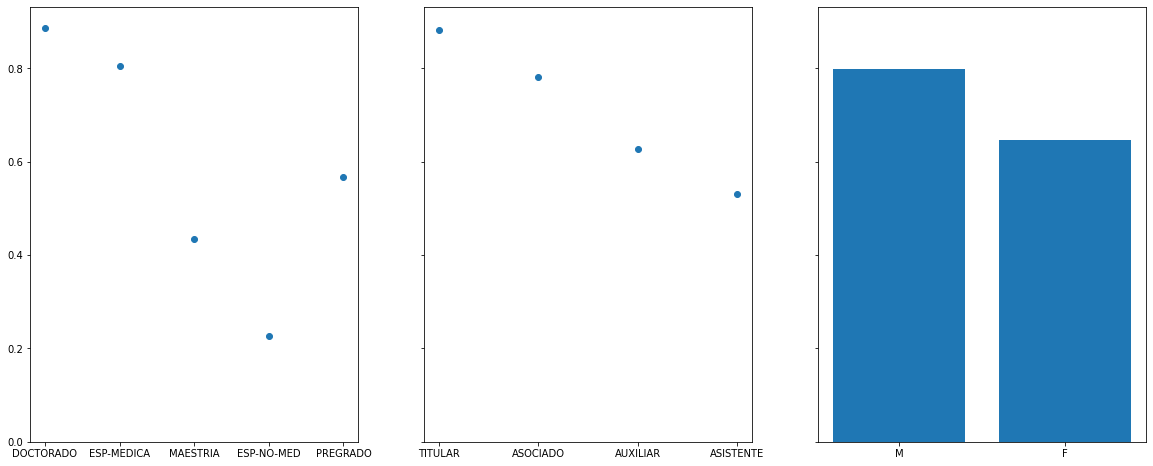

In [170]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["citations/products"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["citations/products"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["citations/products"])
plt.show()

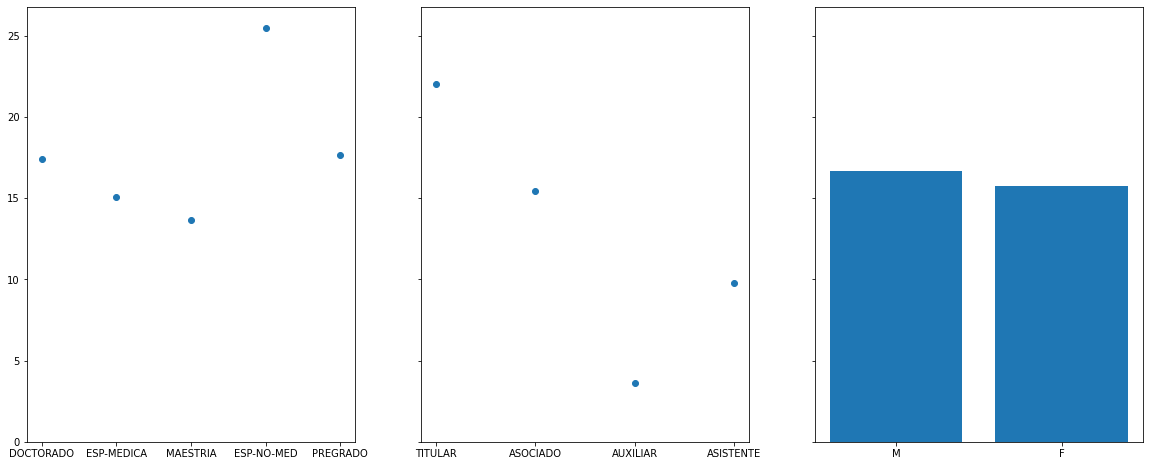

In [169]:
dfgb=data.groupby(by="level",sort=False)
fig, axs = plt.subplots(1, 3, figsize=(20,8), sharey=True)
axs[0].plot(dfgb.sum().index,dfgb.mean()["time"],"o")
dfgb=data.groupby(by="category",sort=False)
axs[1].plot(dfgb.sum().index,dfgb.mean()["time"],"o")
dfgb=data.groupby(by="sex",sort=False)
axs[2].bar(dfgb.sum().index,dfgb.mean()["time"])
plt.show()

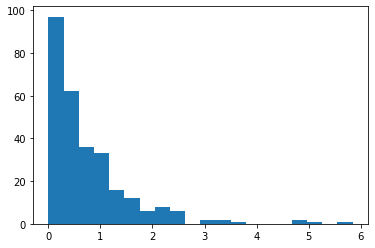

In [171]:
plt.hist(data["citations/products"],bins=20);

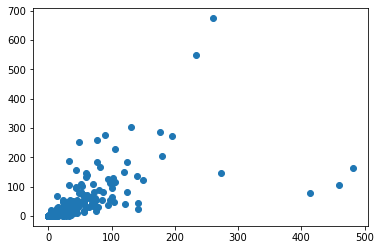

In [115]:
plt.plot(data["products"],data["citations"],"o");

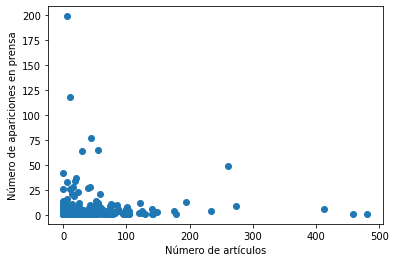

In [116]:
plt.plot(data["products"],data["press"],"o");
plt.xlabel("Número de artículos")
plt.ylabel("Número de apariciones en prensa")
plt.show()

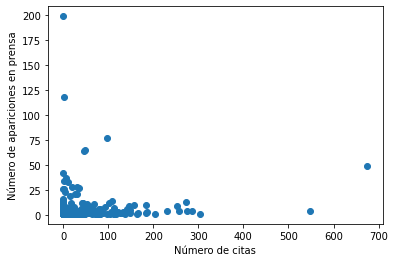

In [117]:
plt.plot(data["citations"],data["press"],"o");
plt.xlabel("Número de citas")
plt.ylabel("Número de apariciones en prensa")
plt.show()

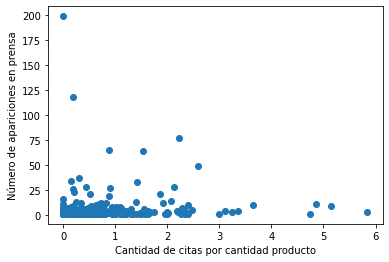

In [172]:
plt.plot(data["citations/products"],data["press"],"o");
plt.xlabel("Cantidad de citas por cantidad producto")
plt.ylabel("Número de apariciones en prensa")
plt.show()

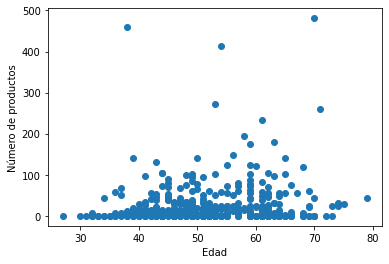

In [161]:
plt.plot(data["age"],data["products"],"o");
plt.xlabel("Edad")
plt.ylabel("Número de productos")
plt.show()

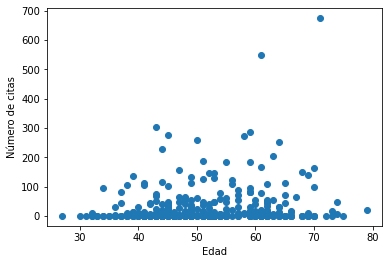

In [162]:
plt.plot(data["age"],data["citations"],"o");
plt.xlabel("Edad")
plt.ylabel("Número de citas")
plt.show()

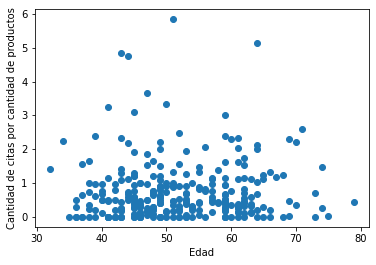

In [173]:
plt.plot(data["age"],data["citations/products"],"o");
plt.xlabel("Edad")
plt.ylabel("Cantidad de citas por cantidad de productos")
plt.show()

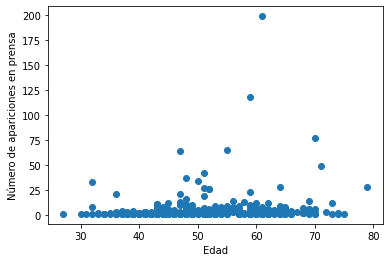

In [163]:
plt.plot(data["age"],data["press"],"o");
plt.xlabel("Edad")
plt.ylabel("Número de apariciones en prensa")
plt.show()

<AxesSubplot:xlabel='sex', ylabel='products'>

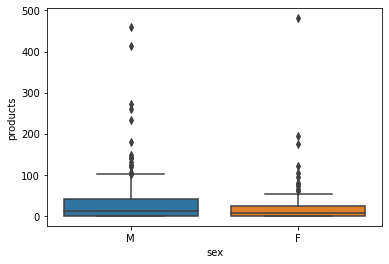

In [120]:
sns.boxplot(x="sex",y="products",data=data)

<AxesSubplot:xlabel='sex', ylabel='citations/products'>

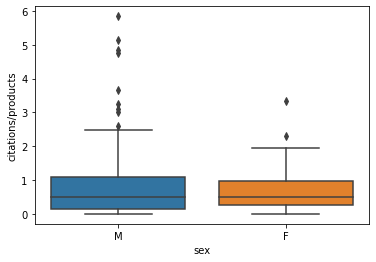

In [174]:
sns.boxplot(x="sex",y="citations/products",data=data)

<AxesSubplot:xlabel='level', ylabel='products'>

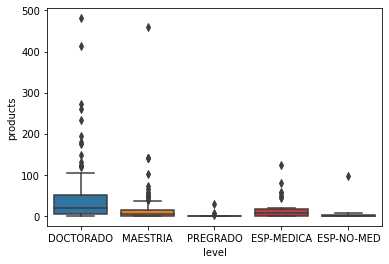

In [121]:
sns.boxplot(x="level",y="products",data=data)

<AxesSubplot:xlabel='level', ylabel='citations/products'>

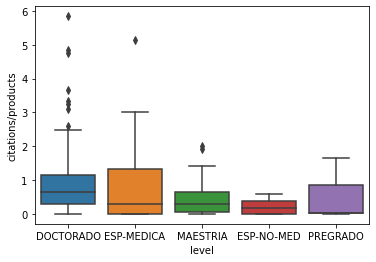

In [175]:
sns.boxplot(x="level",y="citations/products",data=data)

<AxesSubplot:xlabel='category', ylabel='products'>

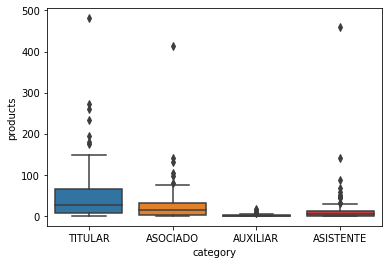

In [122]:
sns.boxplot(x="category",y="products",data=data)

<AxesSubplot:xlabel='category', ylabel='citations/products'>

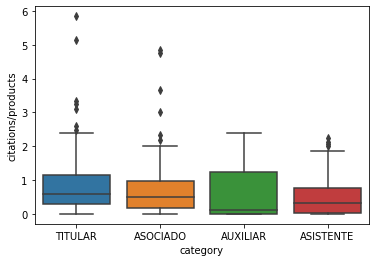

In [176]:
sns.boxplot(x="category",y="citations/products",data=data)

<AxesSubplot:xlabel='category', ylabel='age'>

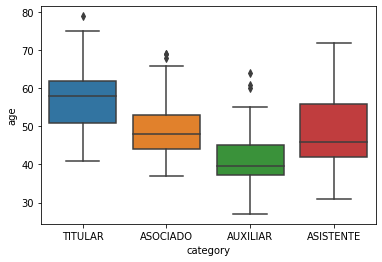

In [123]:
sns.boxplot(x="category",y="age",data=data)

<AxesSubplot:xlabel='level', ylabel='age'>

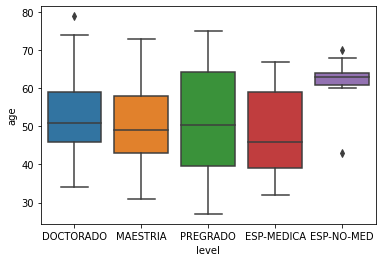

In [124]:
sns.boxplot(x="level",y="age",data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


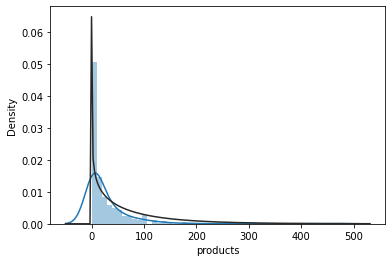

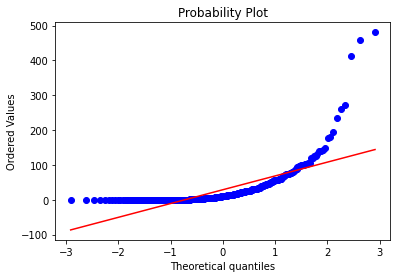

In [156]:
sns.distplot(data["products"],fit=stats.chi2);
plt.figure()
stats.probplot(data["products"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


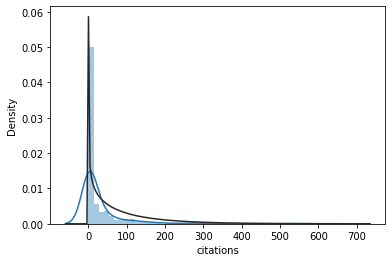

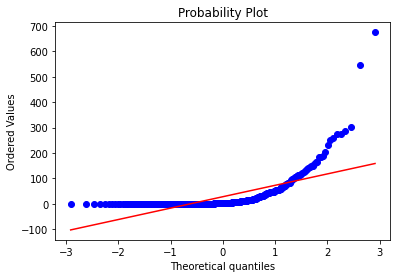

In [158]:
sns.distplot(data["citations"],fit=stats.chi2);
plt.figure()
stats.probplot(data["citations"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


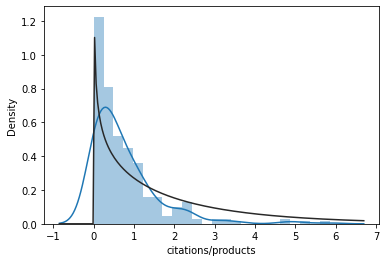

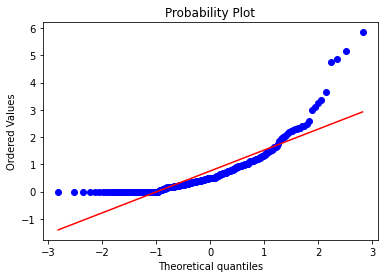

In [177]:
sns.distplot(data["citations/products"],fit=stats.chi2);
plt.figure()
stats.probplot(data["citations/products"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


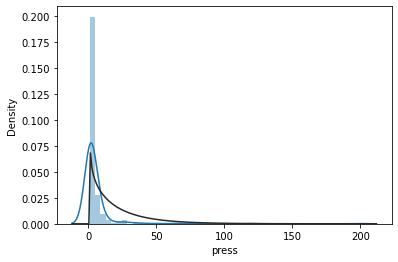

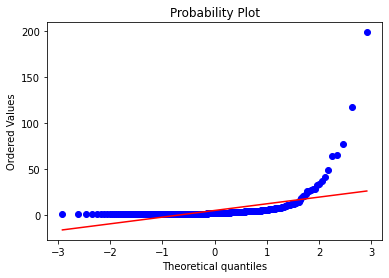

In [159]:
sns.distplot(data["press"],fit=stats.chi2);
plt.figure()
stats.probplot(data["press"],plot=plt);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


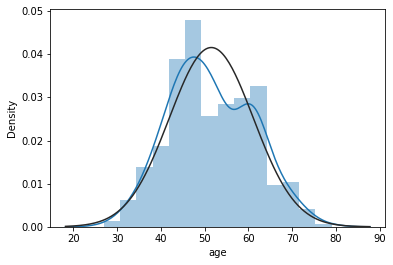

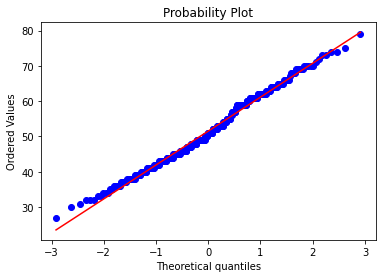

In [160]:
sns.distplot(data["age"],fit=stats.norm);
plt.figure()
stats.probplot(data["age"],plot=plt);

# Análisis exploratorio multivariado

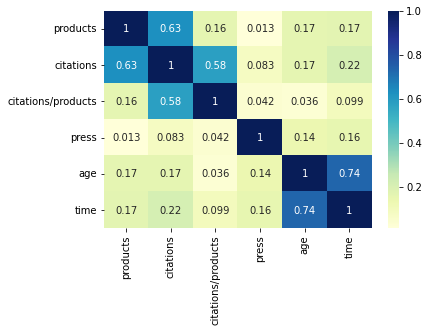

In [178]:
sns.heatmap(data[["products","citations","citations/products","press","age","time"]].corr(), cmap="YlGnBu", annot=True);

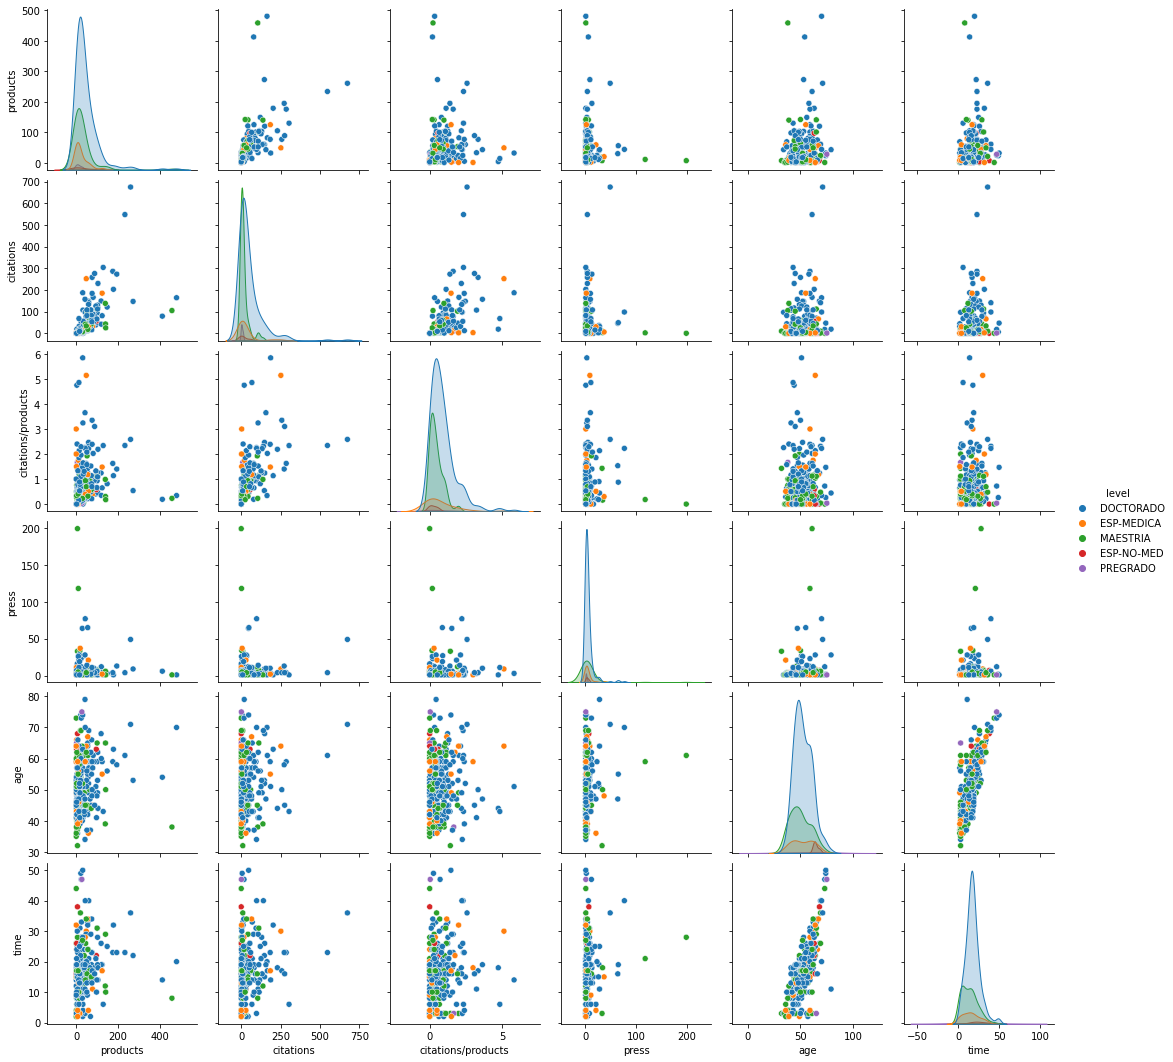

In [179]:
sns.pairplot(data[["products","citations","citations/products","press","age","time","level"]],kind="scatter",hue="level")

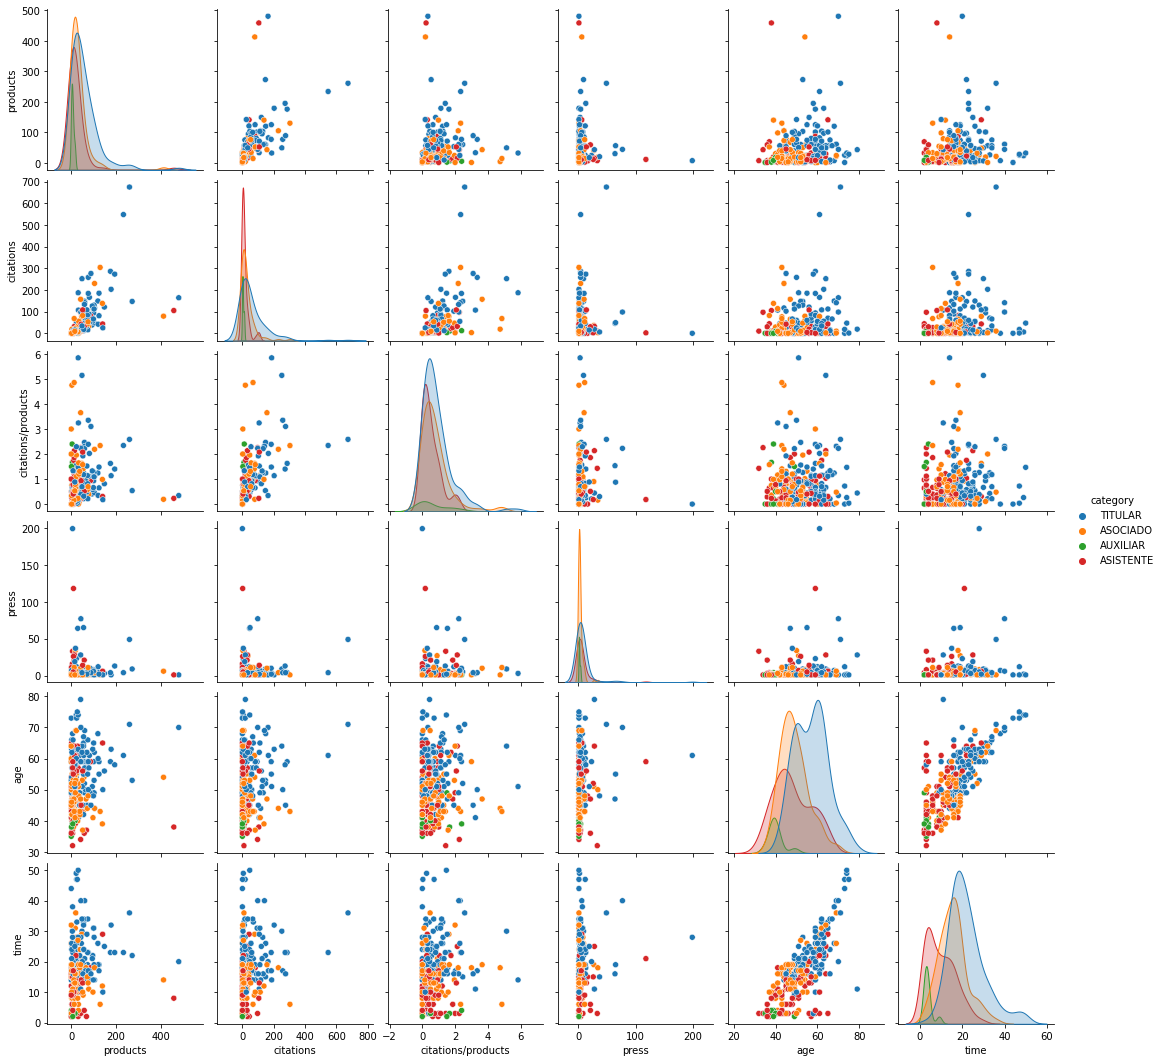

In [180]:
sns.pairplot(data[["products","citations","citations/products","press","age","time","category"]],kind="scatter",hue="category")

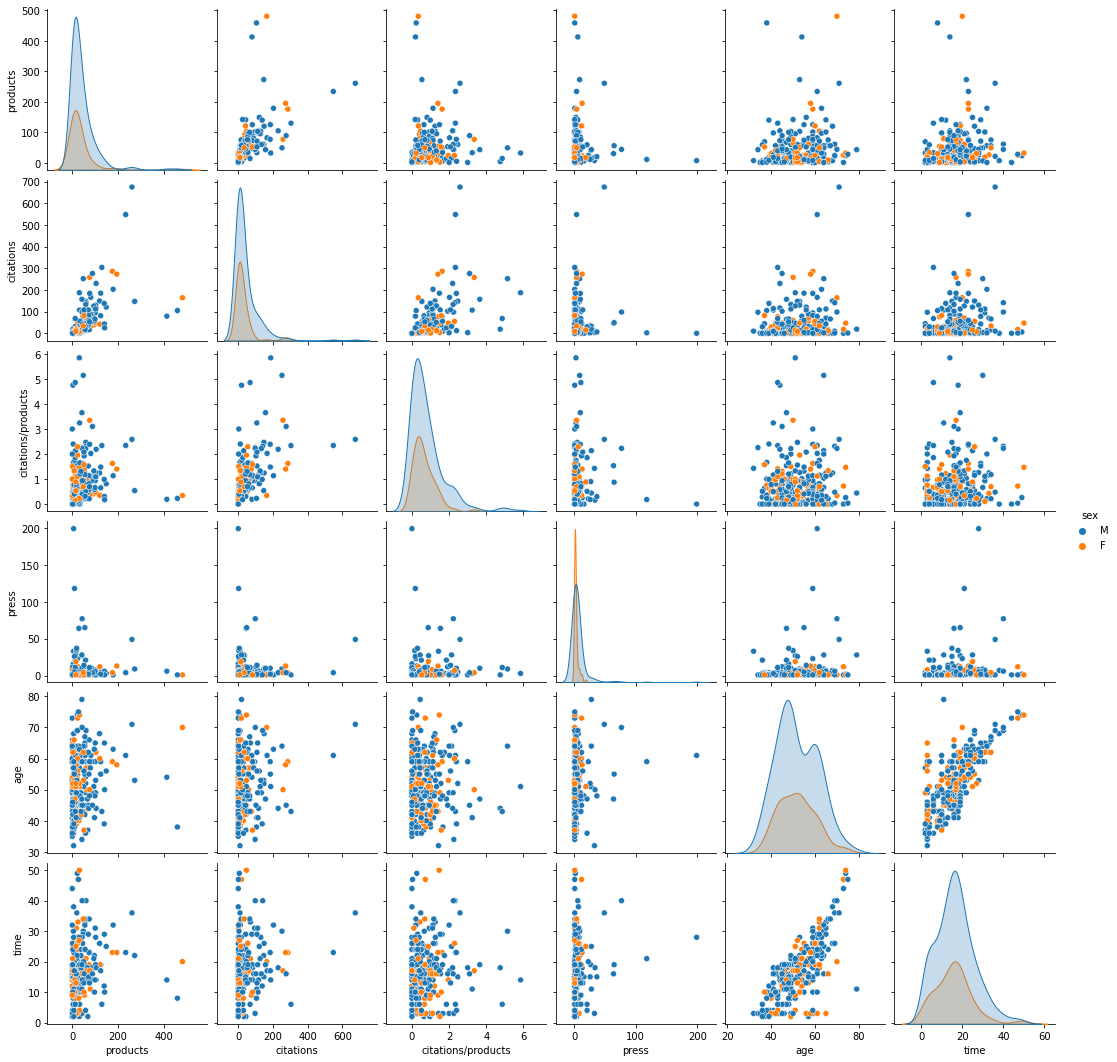

In [181]:
sns.pairplot(data[["products","citations","citations/products","press","age","time","sex"]],kind="scatter",hue="sex")

# PCA

# Clustering

# Modelos